<a href="https://colab.research.google.com/github/trail99/Machine-Learning/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets import cifar10


# Download the dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

# def grayscale(data):
# 	# Convert the image into single channel image
# 	r,g,b = np.asarray(.3, dtype='float32'), np.asarray(.59, dtype='float32'), np.asarray(.11, dtype='float32')
# 	rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
# 	rst = np.expand_dims(rst,axis=3)
# 	return rst


# Normalize the training data

xTrain = tf.keras.utils.normalize(xTrain, axis=1)

xTest = tf.keras.utils.normalize(xTest, axis=1)


# Create a model object using Sequential Model from Keras
model = Sequential()

# xTrain = grayscale(xTrain)
# xTest = grayscale(xTest)

#Adding the input layer
model.add(Flatten(input_shape=(32,32,3)))

#Adding one of two Hidden(Dense) layer
model.add(Dense(100,activation='relu'))

model.add(Dense(100, activation='relu'))

# The output layer
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(xTrain, yTrain, epochs=3)


valLoss, valAcc = model.evaluate(xTest, yTest)
print("validation loss: {} validation accuracy {}".format(valLoss, valAcc))

model.save('cifart.model')
print('Model Saved')


Epoch 1/3
50000/50000 [==============================] - 6s 113us/sample - loss: 2.0316 - acc: 0.2615
Epoch 2/3
50000/50000 [==============================] - 6s 113us/sample - loss: 1.8709 - acc: 0.3313
Epoch 3/3
10000/10000 [==============================] - 1s 95us/sample - loss: 1.7801 - acc: 0.3746
validation loss: 1.7800681980133057 validation accuracy 0.37459999322891235
Model Saved


In [5]:
print(xTest[0].shape)
print(xTrain[0].shape)

(32, 32, 3)
(32, 32, 3)


In [17]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

xTest = tf.keras.utils.normalize(xTest, axis=1)


model = load_model('cifart.model')

# Use this model to predict the output

predictions = model.predict([xTest])

print(predictions[0])
print("Predicted value is:", np.argmax(predictions[0]))



[0.0137968  0.02803226 0.22125797 0.18926978 0.0775543  0.17064896
 0.28011927 0.00775744 0.00658038 0.00498284]
Predicted value is: 6


In [12]:
print(predictions[0][1])

0.07748452


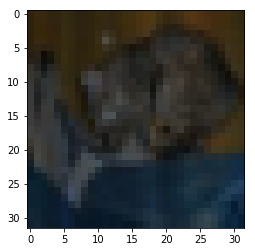

In [18]:
plt.imshow(xTest[0])
plt.show()